In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
from scipy.stats import ttest_ind, pearsonr, gamma, normaltest

sns.set_context("paper", font_scale=2)

# Содержание

Данный ноутбук содержит домашние задания на первые четыре дня интенсива "Погружение в A/B-тестирование".

Для каждого дня и темы вам предоставлен код из соответствующей демонстрации. Для выполнения задания вам нужно произвести соответствующие изменения в существующем коде, чтобы он подходил под условия задания. Некоторые из мест, которые нужно изменить, вы можете найти по комментарию **#TODO**. Остальные места для изменения кода вам нужно найти самостоятельно.

Вопросы в рамках одной темы нужно выполнять последовательно, т.к. результаты последующих заданий зависят от расчетов предыдущих заданий.

## Практическое задание 1 "Распределение значения метрики с помощью Bootstrap"

1. Укажите смоделированное **среднее значение выборки** при следующих условиях:
- гамма-распределение (параметры: k=2, theta = 2);
- размер выборки равен 2000;
- округлите результат до целого значения.

Рекомендации: ширину бина для визуализации можно поставить равную 50.

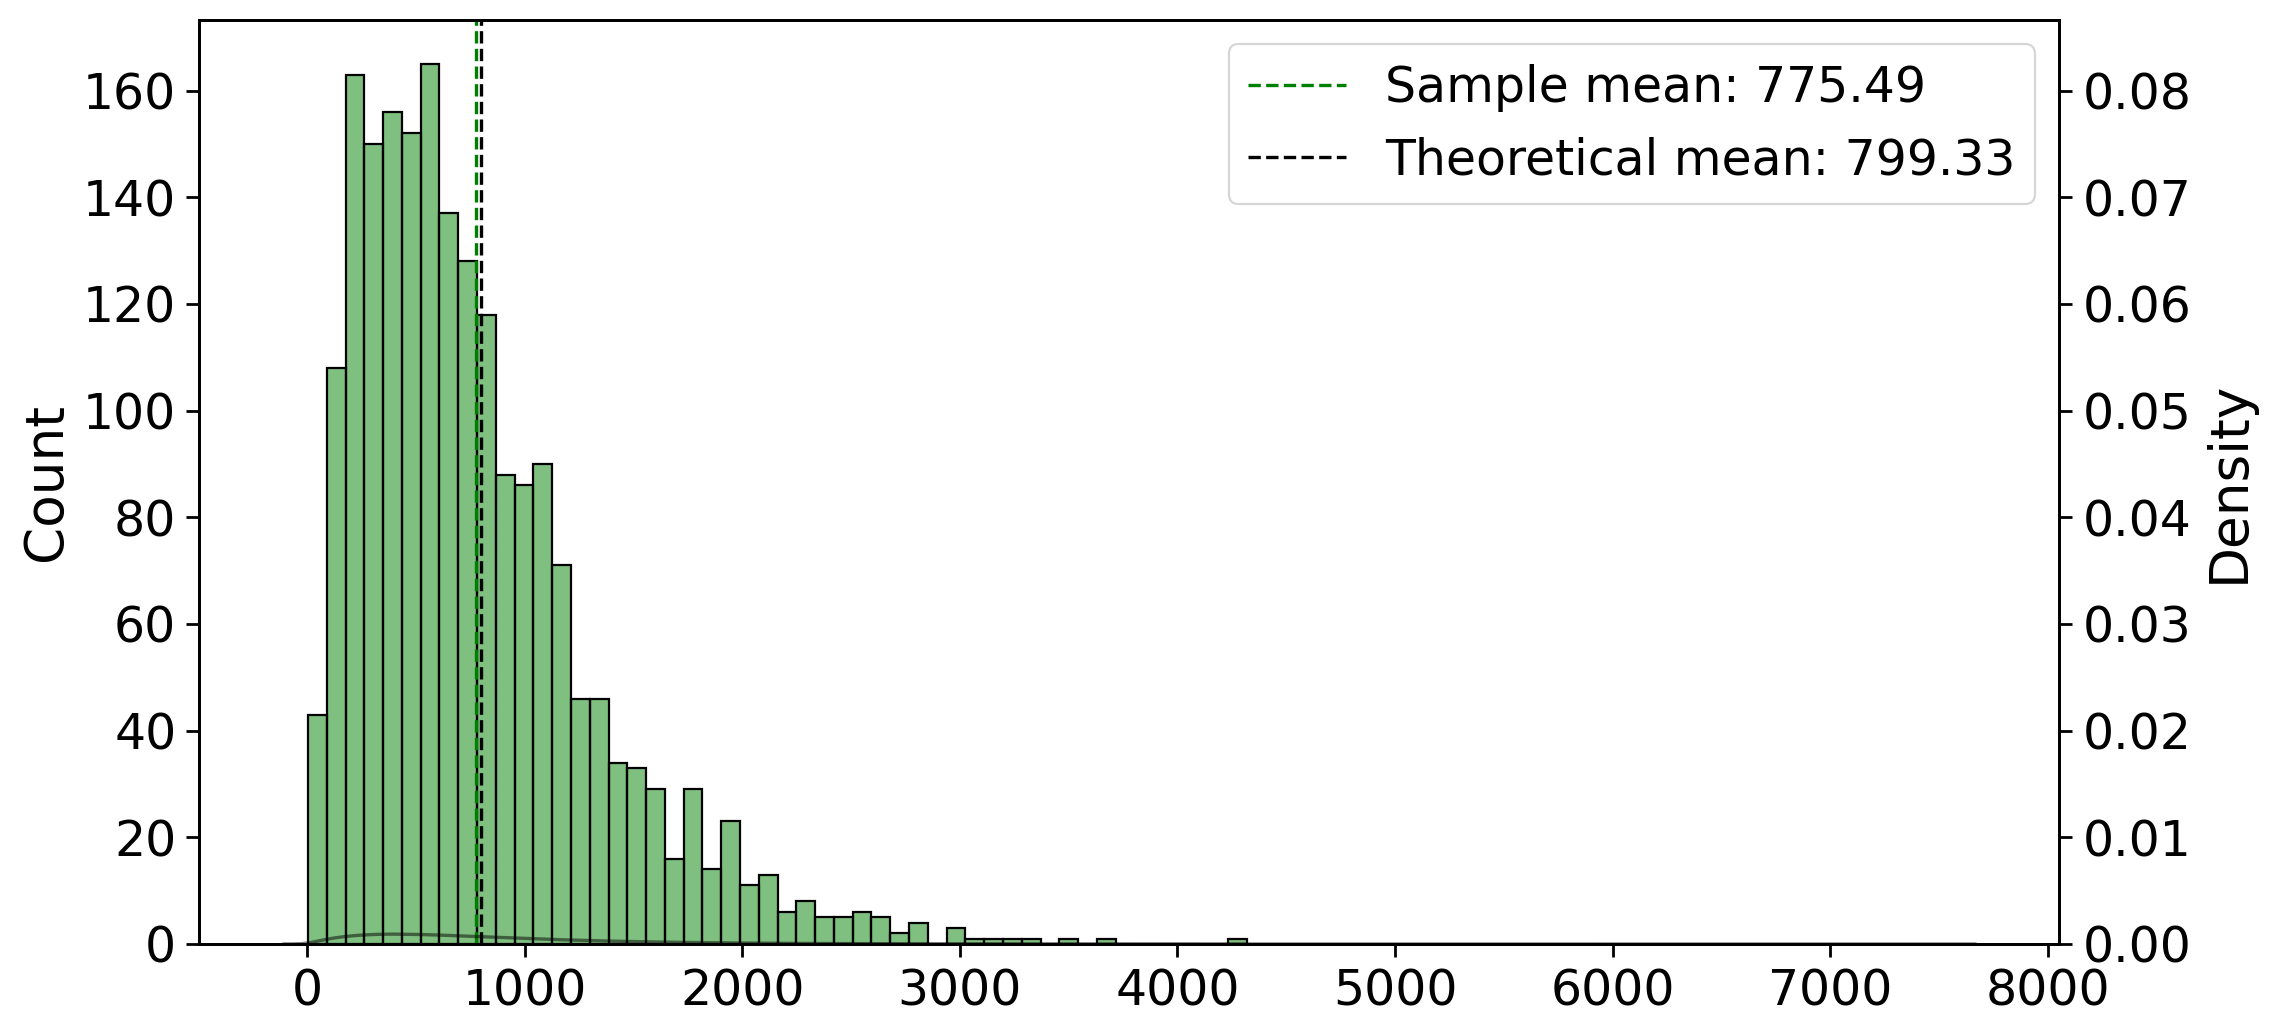

In [26]:
# Для воспроизводимости графиков задаем определенный seed
np.random.seed(42)

gamma_dist = np.random.gamma(2, 2, 1000000)*200      # TODO: поменяйте распределение на гамма-распределение
sample = np.random.choice(gamma_dist, 2000, replace=False)  # TODO: поменяйте размер выборки на нужный

# Отрисовываем график обозначая среднее распределения и выборки
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=200)

# Строим гистограмму выборки и отмечаем средние значения вертикальной линией
sns.histplot(sample, bins=50, ax=ax1, color='green', alpha=0.5)
ax1.axvline(np.mean(sample), color='green', linestyle='--', label=f'Sample mean: {np.mean(sample):.2f}')
ax1.axvline(np.mean(gamma_dist), color='black', linestyle='--', label=f'Theoretical mean: {np.mean(gamma_dist):.2f}')


# Добавляем дополнительную ось Y
ax2 = ax1.twinx()

# Строим кривую плотности вероятности и выравниваем вторую ось Y относительно первой
sns.kdeplot(gamma_dist, ax=ax2, color='black', alpha=0.5)
ax2.set_ylim(0, ax1.get_ylim()[1] / len(sample))

ax1.legend()
plt.show()

2. Какую форму распределения будет иметь распределение средних, рассчитанное на множестве средних подвыборок из гамма распределений?
3.	Запишите нижнюю и верхнюю границы 95% доверительного интервала, а также полученное среднее значение. Ответ округлите до целых, запишите через запятую с пробелом.

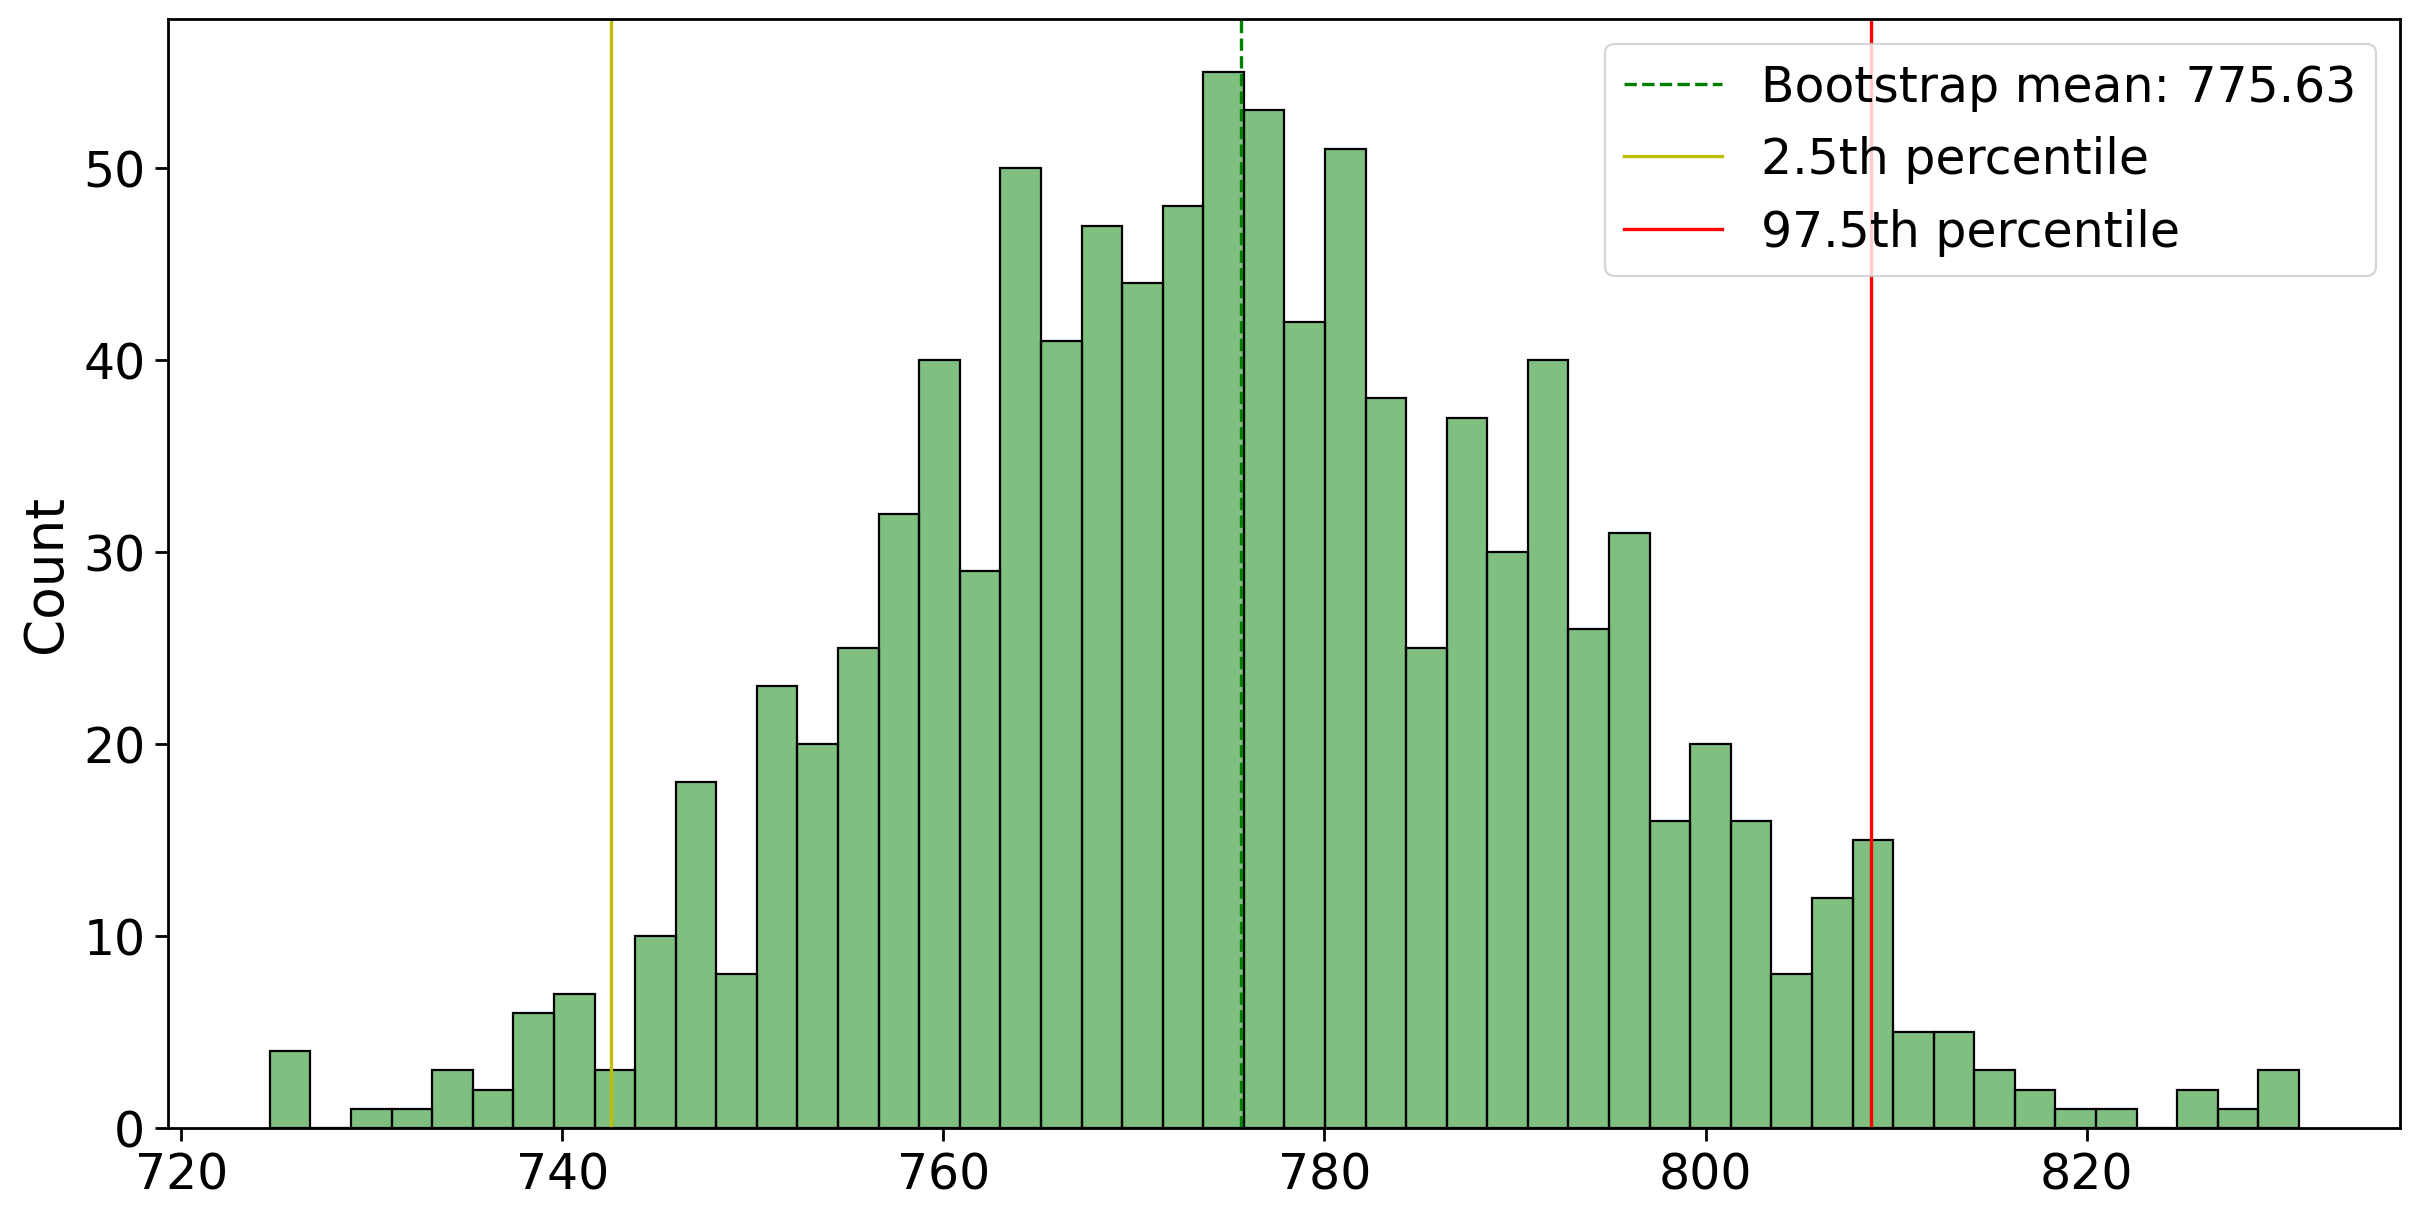

In [18]:
# Проводим bootstrap
# Берем подвыборки из нашей выборки с возратом. Считаем средние значения для каждой подвыборки и добавляем их в список
# Делаем так 1000 раз
np.random.seed(42)

mean_list = []
for _ in range(1000):
    subsample = np.random.choice(sample, 1000)
    mean_list.append(np.mean(subsample))

bootstrap_mean= np.mean(mean_list)

fig, ax = plt.subplots(figsize=(14.4, 7.2), dpi=200)

sns.histplot(mean_list, bins=50, color='green', alpha=0.5)
ax.axvline(bootstrap_mean, color='green', linestyle='--', label=f'Bootstrap mean: {bootstrap_mean:.2f}')
ax.axvline(x=np.percentile(mean_list,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
ax.axvline(x=np.percentile(mean_list,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

ax.legend()
plt.show()

In [27]:
# здесь ваш код расчета доверительного интервала
alpha = 0.05
z = abs(norm.ppf(1 - alpha / 2))
mean = np.mean(sample)
std = np.std(sample)
MOE = z * std / np.sqrt(2000)
ci_left, ci_right = mean - MOE, mean + MOE
print(ci_left, ci_right)


751.1618205873051 799.8160419894796
